In [2]:
from typing import List

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import summarize_features, print_df
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from xgboost import XGBClassifier

import itertools


In [3]:
def isin_filter(df: pd.DataFrame, col: str, values: List):
    return df[df[col].isin(values)]

# filtered_on = list(itertools.chain.from_iterable([zip([key]*len(vals), vals) for key, vals in differentiate_confusion_matrix_over.items()]))
# TODO: finish this one
# differentiate_confusion_matrix_over = {
#     'ovar_histtype': [
#         ([2], lambda df: isin_filter(df, 'ovar_histtype', [2])), 
#         ([4], lambda df: isin_filter(df, 'ovar_histtype', [4])), 
#         ([6], lambda df: isin_filter(df, 'ovar_histtype', [6])), 
#         ([8], lambda df: isin_filter(df, 'ovar_histtype', [8])), 
#         ([9], lambda df: isin_filter(df, 'ovar_histtype', [9])), 
#         ([31], lambda df: isin_filter(df, 'ovar_histtype', [31])),  
#         ([34], lambda df: isin_filter(df, 'ovar_histtype', [34])), 
#         # ([39], lambda df: isin_filter(df, 'ovar_histtype', [39])),
#         ([2, 4, 6, 8, 9, 31], lambda df: isin_filter(df, 'ovar_histtype', [2, 4, 6, 8, 9, 31]))
#     ]
# }
differentiate_confusion_matrix_over = {
    'ovar_histtype': [
        ([2], lambda df: isin_filter(df, 'ovar_histtype', [2, -1])), 
        ([4], lambda df: isin_filter(df, 'ovar_histtype', [4, -1])), 
        ([6], lambda df: isin_filter(df, 'ovar_histtype', [6, -1])), 
        ([8], lambda df: isin_filter(df, 'ovar_histtype', [8, -1])), 
        ([9], lambda df: isin_filter(df, 'ovar_histtype', [9, -1])), 
        ([31], lambda df: isin_filter(df, 'ovar_histtype', [31, -1])),  
        ([34], lambda df: isin_filter(df, 'ovar_histtype', [34, -1])), 
        # ([39], lambda df: isin_filter(df, 'ovar_histtype', [39])),
        ([2, 4, 6, 8, 9, 31], lambda df: isin_filter(df, 'ovar_histtype', [2, 4, 6, 8, 9, 31, -1]))
    ]
}

In [4]:
filesuffix = 'experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials'
# filesuffix = 'experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials'
cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(filesuffix)

In [5]:
# for analytics_util in cv_analytics_util.analytics_utils:
#     test_df = analytics_util.data_util.test_df
#     test_df['ovar_histtype'] = test_df['ovar_histtype'].fillna(-1)
#     analytics_util.data_util.test_df = test_df

In [6]:
# test_df[['ovar_histtype']]

In [7]:
# TODO: ovar_histtype + healthy people 

# `TODO`: visualize threshold for particular hittype
# `TODO`: Change in confidence as years go by. 

In [12]:

def plot_hist_side_by_side_for_class(df, label, xaxis, normalize = True, title=''):
    # Compute histogram
    plt.style.use('seaborn-deep')
    fig, ax = plt.subplots(1, 1, figsize=(20, 8))
    num_bins = 20
    positive_df = df[df[label] == 1]
    bin_edges = np.linspace(0, 1, num_bins + 1)
    hist_positive, bin_edges = np.histogram(positive_df[xaxis], bins=bin_edges)

    negative_df = df[df[label] == 0]
    hist_negative, bin_edges = np.histogram(negative_df[xaxis], bins=bin_edges)
    if normalize:
        hist_positive = hist_positive / sum(hist_positive)
        hist_negative = hist_negative / sum(hist_negative)
    ax.hist([bin_edges[:-1], bin_edges[:-1]], bin_edges, weights=[hist_positive, hist_negative], label=['positive', 'negative'])
    ax.legend(title=label)
    ax.set_ylabel('Class percentage')
    ax.set_xlabel(xaxis)
    plt.title(title)
    plt.show()

def get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years', filter=None):
    id_and_confidence = []
    for analytics_util in cv_analytics_util.analytics_utils:
        X_test = analytics_util.data_util.test_df
        X_test_mismatch = X_test.copy()
        y_pred, y_prob = analytics_util.get_predictions() 
        X_test_mismatch[f'{label}_pred'] = y_pred
        X_test_mismatch[f'{label}_prob'] = y_prob
        id_and_confidence.append(X_test_mismatch)
    full_dataset = pd.concat(id_and_confidence)
    if filter:
        full_dataset = filter(full_dataset)
    return full_dataset

filtering over: ovar_histtype: [2]


Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.999798  | 0.000183896 | 0.999282 | 1        |
| recall__class_0    | 0.995717  | 0.00111952  | 0.994303 | 0.997444 |
| f1-score__class_0  | 0.997753  | 0.000587117 | 0.996998 | 0.998676 |
| precision__class_1 | 0.0462128 | 0.031096    | 0        | 0.121212 |
| recall__class_1    | 0.516667  | 0.268821    | 0        | 1        |
| f1-score__class_1  | 0.0822771 | 0.0507267   | 0        | 0.195122 |
| accuracy           | 0.995517  | 0.00116907  | 0.994016 | 0.997357 |
| auc                | 0.958016  | 0.0317992   | 0.90304  | 1        |
+--------------------+-----------+-------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


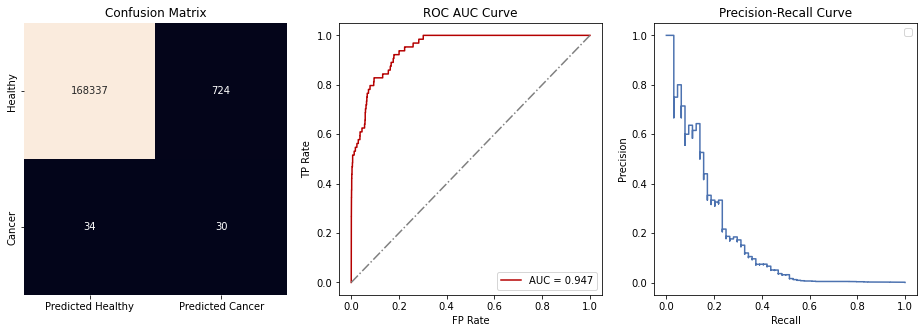

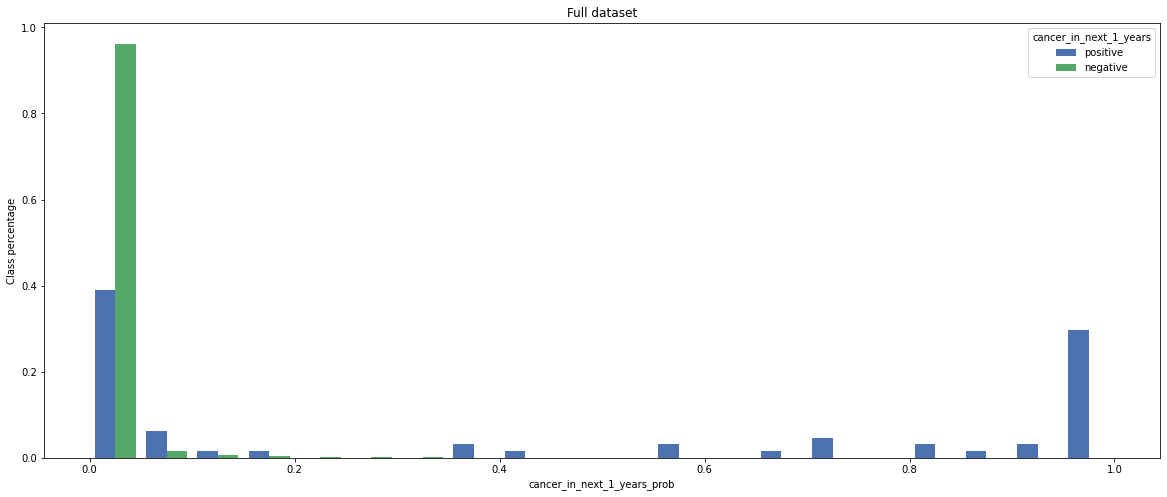

filtering over: ovar_histtype: [4]


Cross-Validation measures:
+--------------------+-----------+-------------+----------+-----------+
|                    |      mean |         std |      min |       max |
|--------------------+-----------+-------------+----------+-----------|
| precision__class_0 | 0.999988  | 3.15619e-05 | 0.99991  | 1         |
| recall__class_0    | 0.995747  | 0.00113862  | 0.994295 | 0.997582  |
| f1-score__class_0  | 0.997863  | 0.000573077 | 0.99714  | 0.99879   |
| accuracy           | 0.995735  | 0.0011415   | 0.994295 | 0.997582  |
| auc                | 0.980818  | 0.0218532   | 0.95993  | 1         |
| precision__class_1 | 0.0172072 | 0.0122667   | 0        | 0.0277778 |
| recall__class_1    | 0.625     | 0.478714    | 0        | 1         |
| f1-score__class_1  | 0.0333517 | 0.0237185   | 0        | 0.0540541 |
+--------------------+-----------+-------------+----------+-----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


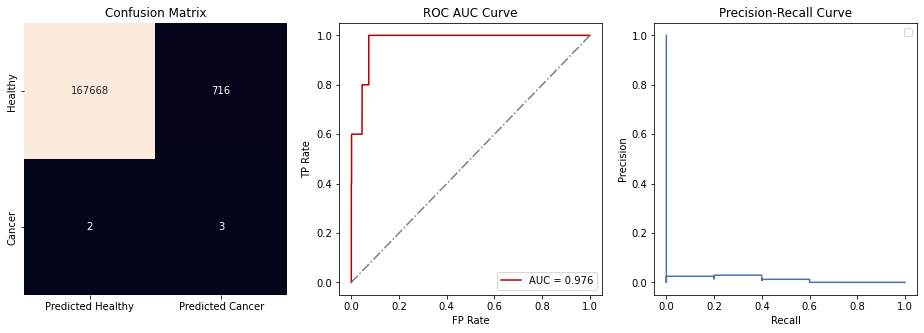

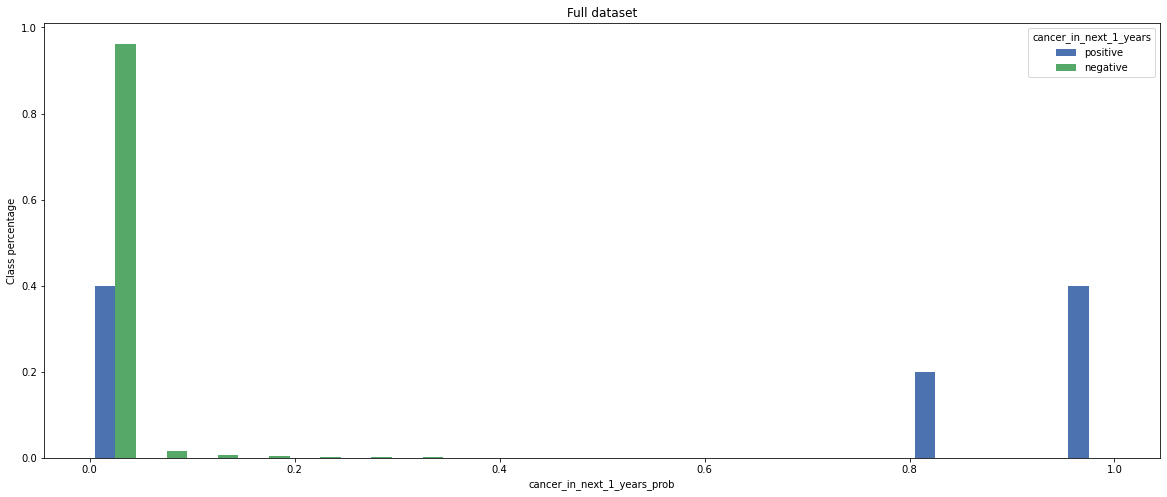

filtering over: ovar_histtype: [6]


Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.999976  | 5.30621e-05 | 0.999821 | 1        |
| recall__class_0    | 0.995754  | 0.00114499  | 0.994296 | 0.997584 |
| f1-score__class_0  | 0.997861  | 0.000577225 | 0.997051 | 0.998791 |
| accuracy           | 0.995731  | 0.0011498   | 0.994119 | 0.997585 |
| auc                | 0.987863  | 0.0285635   | 0.912433 | 1        |
| precision__class_1 | 0.026246  | 0.0401192   | 0        | 0.129032 |
| recall__class_1    | 0.666667  | 0.5         | 0        | 1        |
| f1-score__class_1  | 0.0486884 | 0.0708582   | 0        | 0.228571 |
+--------------------+-----------+-------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


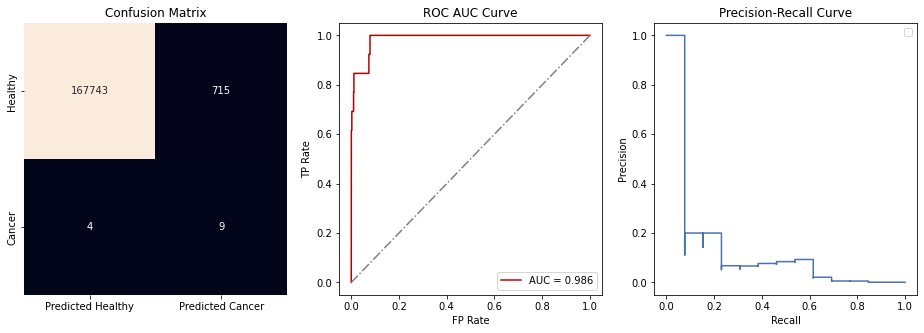

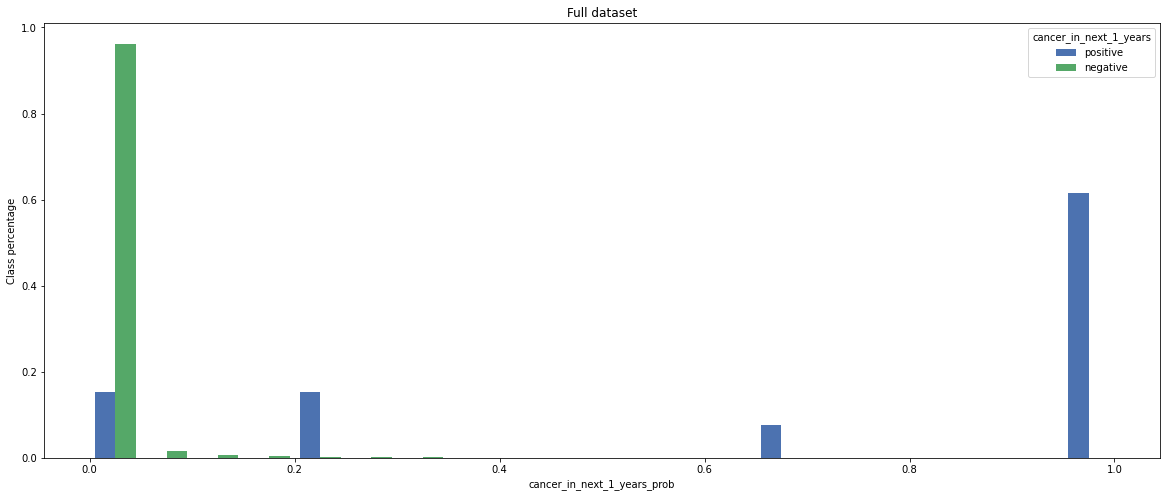

filtering over: ovar_histtype: [8]


Cross-Validation measures:
+--------------------+-----------+-------------+-----------+-----------+
|                    |      mean |         std |       min |       max |
|--------------------+-----------+-------------+-----------+-----------|
| precision__class_0 | 1         | 0           | 1         | 1         |
| recall__class_0    | 0.995753  | 0.00114551  | 0.994295  | 0.997584  |
| f1-score__class_0  | 0.997871  | 0.000575087 | 0.99714   | 0.99879   |
| precision__class_1 | 0.025322  | 0.0105569   | 0.0178571 | 0.0327869 |
| recall__class_1    | 1         | 0           | 1         | 1         |
| f1-score__class_1  | 0.0492899 | 0.0200849   | 0.0350877 | 0.0634921 |
| accuracy           | 0.995753  | 0.00114544  | 0.994295  | 0.997584  |
| auc                | 0.999644  | 0.000251527 | 0.999466  | 0.999822  |
+--------------------+-----------+-------------+-----------+-----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


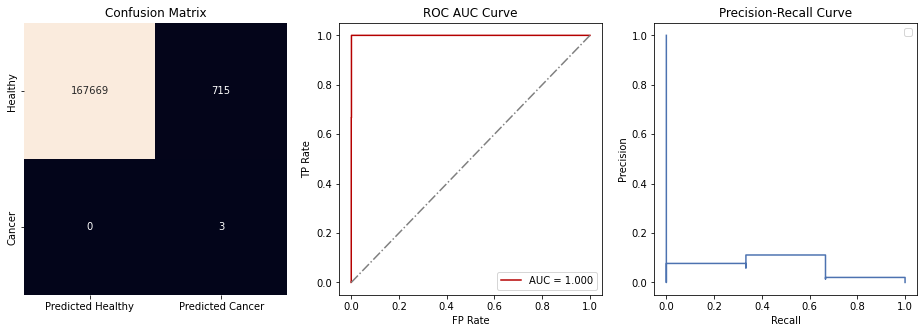

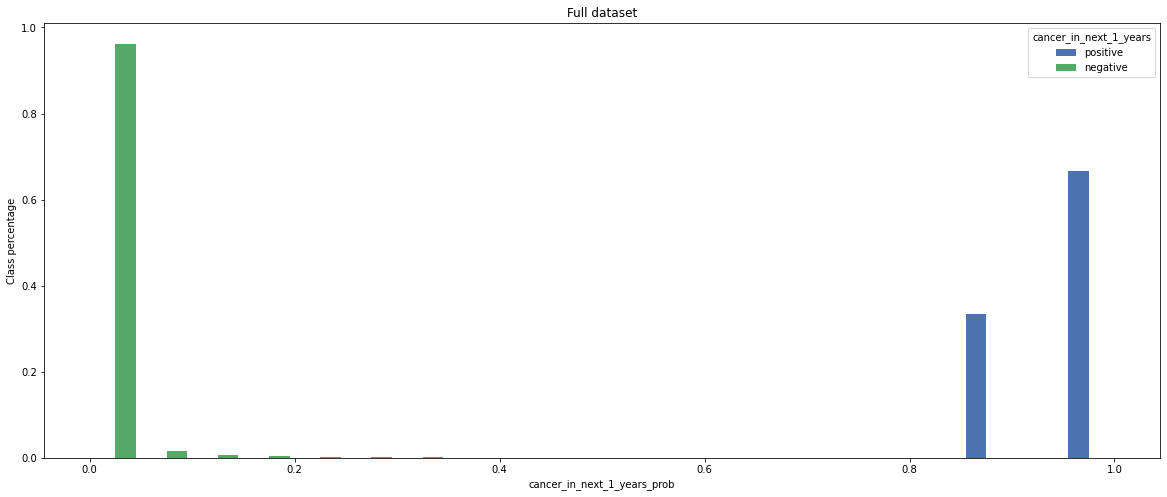

filtering over: ovar_histtype: [9]


Cross-Validation measures:
+--------------------+----------+---------------+----------+----------+
|                    |     mean |           std |      min |      max |
|--------------------+----------+---------------+----------+----------|
| precision__class_0 | 0.999994 |   2.31444e-05 | 0.99991  | 1        |
| recall__class_0    | 0.995752 |   0.00114546  | 0.994295 | 0.997582 |
| f1-score__class_0  | 0.997868 |   0.000574036 | 0.99714  | 0.99879  |
| accuracy           | 0.995746 |   0.00114342  | 0.994295 | 0.997582 |
| auc                | 0.93472  | nan           | 0.93472  | 0.93472  |
| precision__class_1 | 0        | nan           | 0        | 0        |
| recall__class_1    | 0        | nan           | 0        | 0        |
| f1-score__class_1  | 0        | nan           | 0        | 0        |
+--------------------+----------+---------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


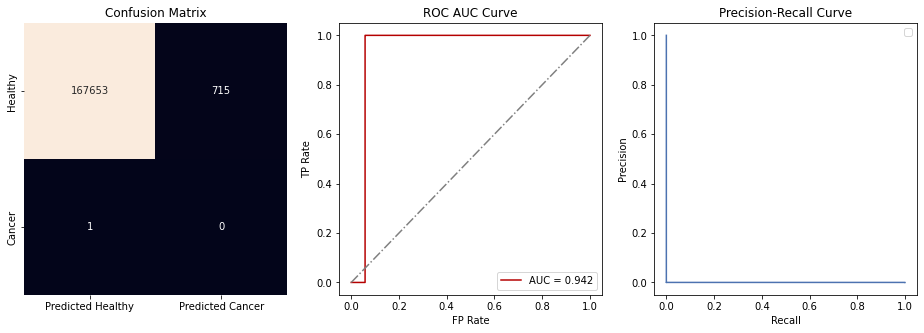

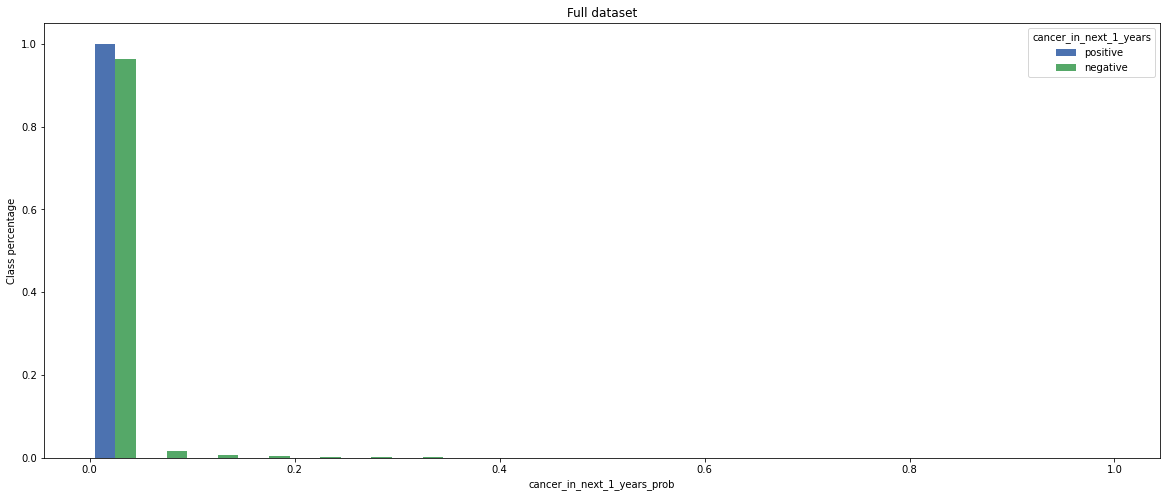

filtering over: ovar_histtype: [31]


Cross-Validation measures:
+--------------------+-----------+-------------+----------+-----------+
|                    |      mean |         std |      min |       max |
|--------------------+-----------+-------------+----------+-----------|
| precision__class_0 | 0.999917  | 9.83485e-05 | 0.999643 | 1         |
| recall__class_0    | 0.995753  | 0.00113368  | 0.994301 | 0.997501  |
| f1-score__class_0  | 0.99783   | 0.000569661 | 0.997143 | 0.998704  |
| precision__class_1 | 0.0142724 | 0.0204605   | 0        | 0.0681818 |
| recall__class_1    | 0.384615  | 0.463404    | 0        | 1         |
| f1-score__class_1  | 0.027189  | 0.0384806   | 0        | 0.12766   |
| accuracy           | 0.995671  | 0.00113459  | 0.994301 | 0.997412  |
| auc                | 0.947488  | 0.0526071   | 0.849574 | 0.999911  |
+--------------------+-----------+-------------+----------+-----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


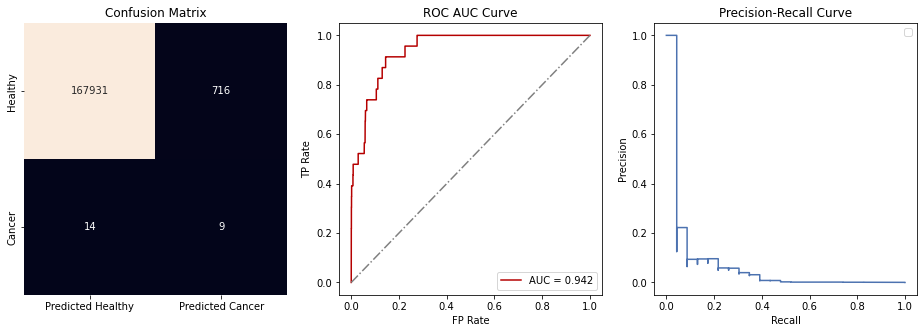

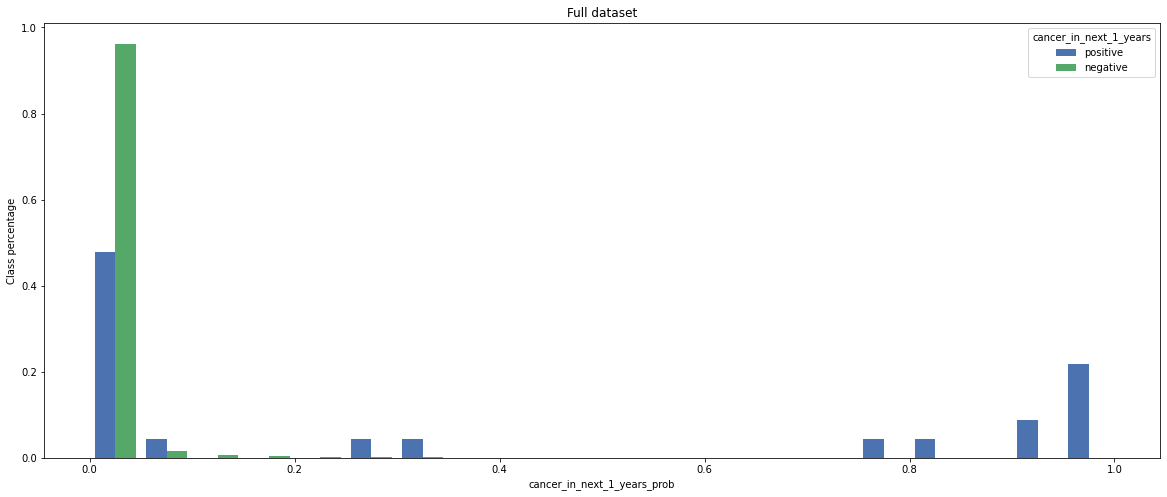

filtering over: ovar_histtype: [34]


Cross-Validation measures:
+--------------------+----------+-------------+----------+----------+
|                    |     mean |         std |      min |      max |
|--------------------+----------+-------------+----------+----------|
| precision__class_0 | 0.999982 | 5.00614e-05 | 0.999822 | 1        |
| recall__class_0    | 0.995752 | 0.00114536  | 0.994295 | 0.997582 |
| f1-score__class_0  | 0.997862 | 0.000571329 | 0.997095 | 0.99879  |
| accuracy           | 0.995735 | 0.00113799  | 0.994207 | 0.997582 |
| auc                | 0.957589 | 0.00942998  | 0.950921 | 0.964257 |
| precision__class_1 | 0        | 0           | 0        | 0        |
| recall__class_1    | 0        | 0           | 0        | 0        |
| f1-score__class_1  | 0        | 0           | 0        | 0        |
+--------------------+----------+-------------+----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


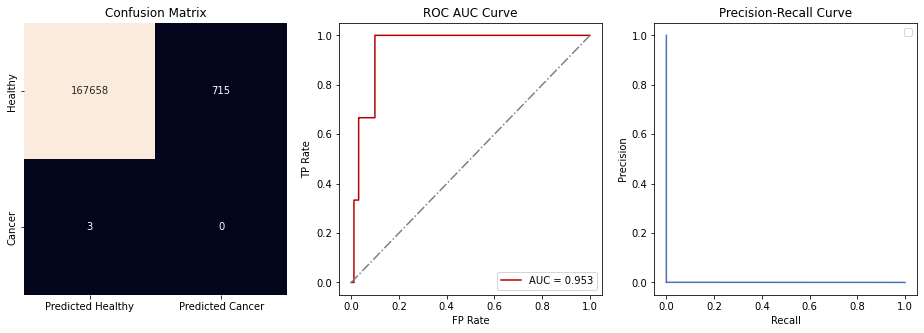

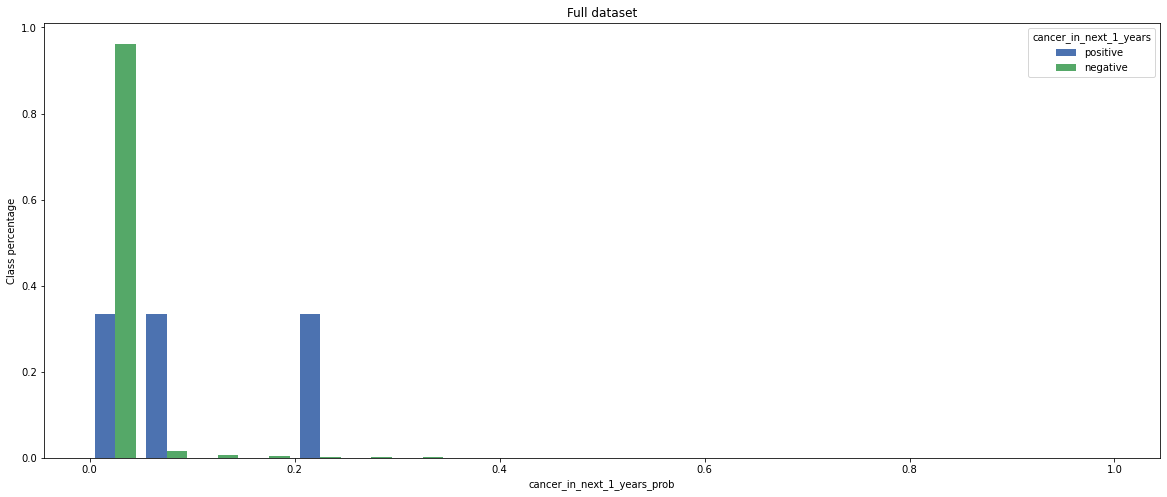

filtering over: ovar_histtype: [2, 4, 6, 8, 9, 31]


Cross-Validation measures:
+--------------------+-----------+-------------+-----------+----------+
|                    |      mean |         std |       min |      max |
|--------------------+-----------+-------------+-----------+----------|
| precision__class_0 | 0.999674  | 0.000230969 | 0.999015  | 0.999911 |
| recall__class_0    | 0.995715  | 0.00110141  | 0.994316  | 0.997449 |
| f1-score__class_0  | 0.99769   | 0.000583147 | 0.996873  | 0.998591 |
| precision__class_1 | 0.0734535 | 0.0505081   | 0.0153846 | 0.210526 |
| recall__class_1    | 0.510635  | 0.210691    | 0.153846  | 0.75     |
| f1-score__class_1  | 0.124992  | 0.0765282   | 0.0285714 | 0.313725 |
| accuracy           | 0.995394  | 0.00116104  | 0.993767  | 0.997186 |
| auc                | 0.959163  | 0.0292822   | 0.898437  | 0.993363 |
+--------------------+-----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


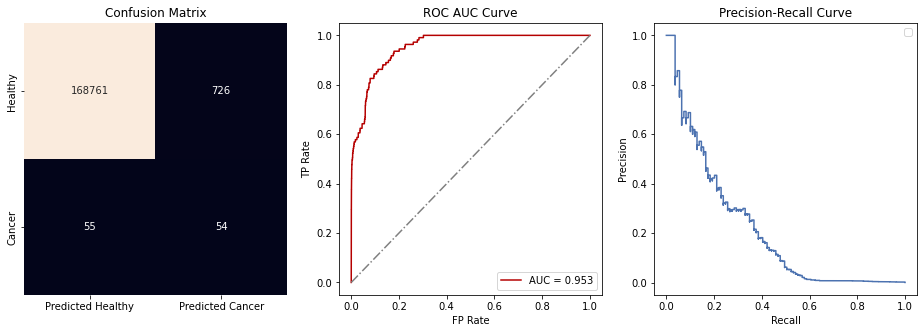

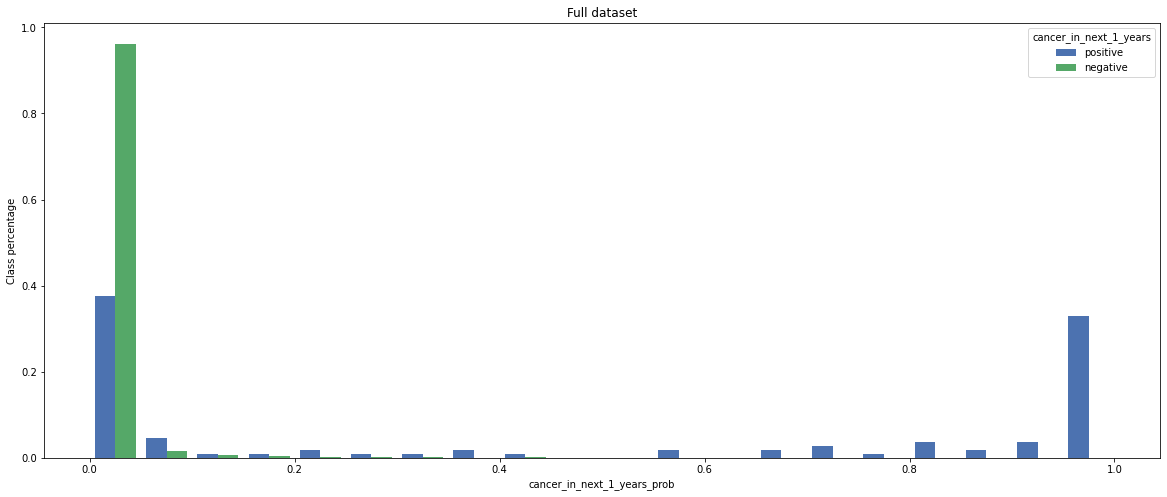

In [13]:
for filter_col, filters in differentiate_confusion_matrix_over.items():
    for filter_vals, filter_func in filters:
        print(f'filtering over: {filter_col}: {filter_vals}')
        cv_analytics_util.set_filter(filter_func)
        cv_analytics_util.get_cv_report();
        cv_analytics_util.display_graph()
        full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years', filter=filter_func)
        plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', normalize = True, title='Full dataset')
